In [2]:
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples = 1000    
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [3]:
n_class_0, n_class_1

(900, 100)

In [4]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1,size= n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1,size= n_class_1),
    'target': [1] * n_class_1
})

In [5]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


In [6]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [7]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [8]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [9]:
df_minority_upsampled.shape

(900, 3)

In [10]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

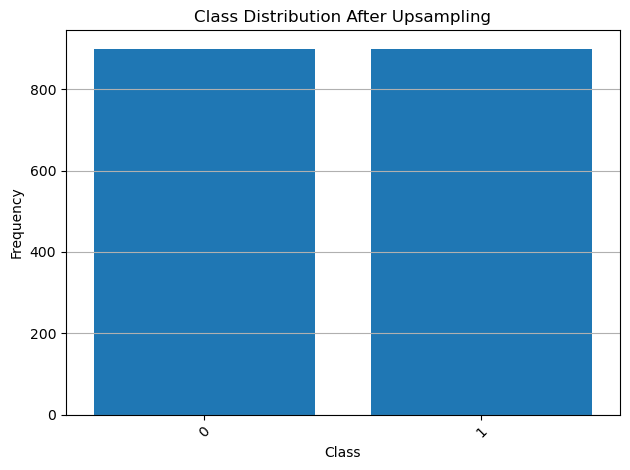

(1800, 3)

In [11]:
df_upsampled['target'].value_counts(normalize=True)
df_upsampled['target'].value_counts()
df_upsampled['target'].value_counts().plot(kind='bar', title='Class Distribution After Upsampling')
import matplotlib.pyplot as plt 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution After Upsampling')
plt.bar(df_upsampled['target'].value_counts().index, df_upsampled['target'].value_counts())
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('class_distribution_after_upsampling.png')      
plt.show()


df_upsampled.to_csv('upsampled_data.csv', index=False)
df_upsampled.shape


In [80]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_minority),  # match minority class size
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Check the class distribution
print(df_downsampled['target'].value_counts())

0    100
1    100
Name: target, dtype: int64


In [98]:
import seaborn as sns
df = sns.load_dataset('tips')
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [99]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded=encoder.fit_transform(df[['day']]).toarray()
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

print('Friday :\n ', encoder_df['day_Fri'].value_counts())
print('Saturday :\n ', encoder_df['day_Sat'].value_counts())
print('Sunday : \n', encoder_df['day_Sun'].value_counts())
print('Thursday :\n ', encoder_df['day_Thur'].value_counts())





Friday :
  0.0    225
1.0     19
Name: day_Fri, dtype: int64
Saturday :
  0.0    157
1.0     87
Name: day_Sat, dtype: int64
Sunday : 
 0.0    168
1.0     76
Name: day_Sun, dtype: int64
Thursday :
  0.0    182
1.0     62
Name: day_Thur, dtype: int64


In [ ]:
days_unique = df['day'].unique().tolist()
days_unique = pd.DataFrame(days_unique, columns=['day'])
days_unique

,day
0,Sun
1,Sat
2,Thur
3,Fri


In [116]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [117]:
encoded=encoder.fit_transform(days_unique[['day']]).toarray()
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [118]:
encoder_df

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
